# Loading the migration data
---
### The Origin.
Migration data was obtained from two sources. The [World Refugee Agency (UNHCR)](http://www.unhcr.org/cgi-bin/texis/vtx/home) and the [Organisation for Economic Co-operation and Development (OECD)](http://www.oecd.org/) are publishing datasets about migration.

### The Format.

**The UNHCR dataset contains the following variables:**
 + Year
 + Country / territory of asylum/residence
 + Origin
 + Refugees (incl. refugee-like situations)
 + Asylum-seekers (pending cases)
 + Returned refugees
 + Internally displaced persons (IDPs)
 + Returned IDPs
 + Stateless persons
 + Others of concern
 + Total Population

**The OECD dataset contains the following variables:**
 + Country of origin
 + Variable (i.e. description if the variable)
    + Acquisition of nationality by country of former nationality
    + Inflows of asylum seekers by nationality
    + Inflows of foreign population by nationality
    + Inflows of foreign workers by nationality
    + Inflows of seasonal foreign workers by nationality
    + Outflows of foreign population by nationality
    + Stock of foreign labour by nationality
    + Stock of foreign population by nationality
    + Stock of foreign-born labour by country of birth
    + Stock of foreign-born population by country of birth
 + Gender
 + Country
 + Year
 + Value
---
As a first step we can have a look at the individual datasets seperately to get a feel for them.

In [1]:
%pylab inline
import sys
sys.path.insert(0,"../lib/")
import pandas as pd

from unhcrData import UNHCRdata
from oecdData  import OECDdata

Populating the interactive namespace from numpy and matplotlib


### UNHCR dataset.


In [2]:
fname = "../data/unhcr/unhcr_popstats_export_persons_of_concern_all_data.csv"
unhcr = UNHCRdata(fname)
unhcr.data.dtypes

Year                                          int64
Country                                      object
Origin                                       object
Refugees (incl. refugee-like situations)    float64
Asylum-seekers (pending cases)              float64
Returned refugees                           float64
Internally displaced persons (IDPs)         float64
Returned IDPs                               float64
Stateless persons                           float64
Others of concern                           float64
Total Population                            float64
dtype: object

Now get some general statistics about the dataset.

In [3]:
idx = ["Refugees (incl. refugee-like situations)", "Asylum-seekers (pending cases)", "Returned refugees", \
       "Internally displaced persons (IDPs)", "Returned IDPs", "Stateless persons", "Others of concern",  \
       "Total Population"]
unhcr.data[idx].describe()

,Refugees (incl. refugee-like situations),Asylum-seekers (pending cases),Returned refugees,Internally displaced persons (IDPs),Returned IDPs,Stateless persons,Others of concern,Total Population
count,80456.000000,54941.000000,6086.000000,416.000000,202.000000,643.000000,701.000000,90700.000000
mean,5301.039450,262.758341,4828.685508,540578.605769,111224.054455,66803.281493,25622.840228,8584.247376
std,64916.260968,3486.498552,42002.645468,878738.829039,199698.704407,273038.402030,94285.658896,102837.213137
min,1.000000,-1.000000,1.000000,470.000000,23.000000,1.000000,1.000000,-1.000000
25%,3.000000,1.000000,2.000000,90746.000000,5000.000000,205.000000,13.000000,3.000000
50%,15.000000,5.000000,13.000000,261704.500000,27284.000000,1720.000000,430.000000,18.000000
75%,142.000000,33.000000,200.000000,594443.000000,104229.500000,11462.500000,6709.000000,172.000000
max,3272290.000000,358062.000000,1569248.000000,7632500.000000,1186889.000000,3500000.000000,957000.000000,7792500.000000


Check for missing values. The number will be in percent of the total entries.

In [4]:
isnan(unhcr.data[idx]).sum() / np.shape(unhcr.data)[0]

Refugees (incl. refugee-like situations)    0.186113
Asylum-seekers (pending cases)              0.444221
Returned refugees                           0.938434
Internally displaced persons (IDPs)         0.995792
Returned IDPs                               0.997957
Stateless persons                           0.993495
Others of concern                           0.992909
Total Population                            0.082485
dtype: float64

The only columns that might be of interest for the project could be the columns `Refugees (incl. refugee-like situations)`, `Asylum-seekers (pending cases)`, and `Total Population`. They will be highly correlated and effectively it might be better to focus on the total population alone.

We can plot the number of people vs. time for individual countries,

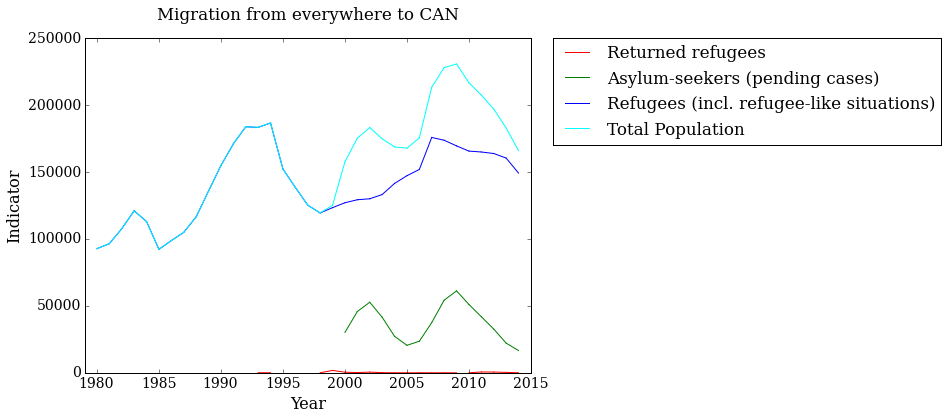

In [5]:
unhcr.show(destination_country="Canada")

we can limit the plot to only investigate the migration between two countries,

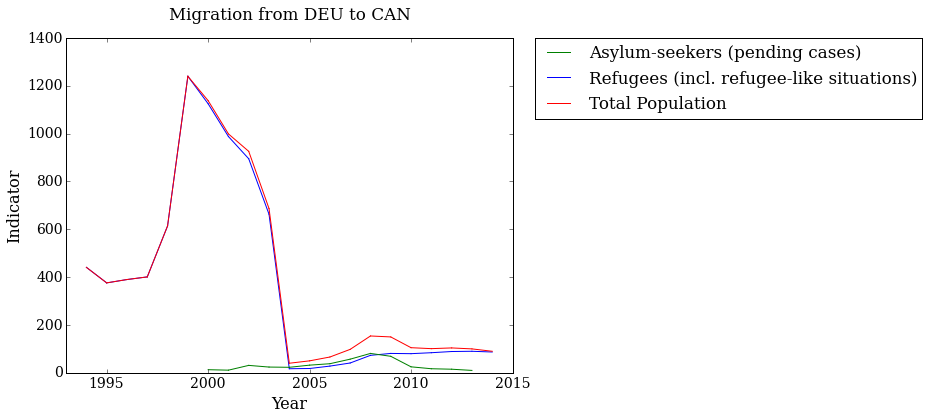

In [6]:
unhcr.show(destination_country="Canada", origin_country="Germany")

it is also possible to get the number of people leaving a specific country,

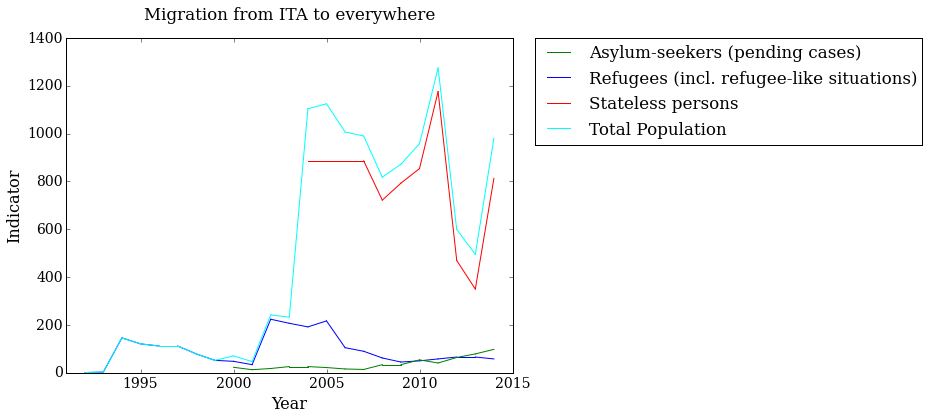

In [7]:
unhcr.show(origin_country="Italy")

Especially in this last plot we can see one difficulty of this dataset. The `Total Population` count can vary drastically if a new variable was introduced in that year. In the current example many `Stateless persons` were reported for year 2003 which drastically changes the `Total Population` count compared to the previous year.

---
### OECD dataset.

In [8]:
fname = "../data/oecd/MIG_15082015002909613.csv.zip"
oecd = OECDdata(fname)
oecd.data.dtypes

Variable
Year                                                             int64
Country                                                         object
Acquisition of nationality by country of former nationality    float64
Inflows of asylum seekers by nationality                       float64
Inflows of foreign population by nationality                   float64
Inflows of foreign workers by nationality                      float64
Inflows of seasonal foreign workers by nationality             float64
Outflows of foreign population by nationality                  float64
Stock of foreign labour by nationality                         float64
Stock of foreign population by nationality                     float64
Stock of foreign-born labour by country of birth               float64
Stock of foreign-born population by country of birth           float64
Origin                                                          object
dtype: object

In [9]:
idx = ["Acquisition of nationality by country of former nationality", "Inflows of asylum seekers by nationality", \
       "Inflows of foreign population by nationality", "Inflows of foreign workers by nationality", \
       "Inflows of seasonal foreign workers by nationality", "Outflows of foreign population by nationality", \
       "Stock of foreign labour by nationality", "Stock of foreign population by nationality", \
       "Stock of foreign-born labour by country of birth", "Stock of foreign-born population by country of birth" ]
oecd.data[idx].describe()

,Acquisition of nationality by country of former nationality,Inflows of asylum seekers by nationality,Inflows of foreign population by nationality,Inflows of foreign workers by nationality,Inflows of seasonal foreign workers by nationality,Outflows of foreign population by nationality,Stock of foreign labour by nationality,Stock of foreign population by nationality,Stock of foreign-born labour by country of birth,Stock of foreign-born population by country of birth
count,46938.000000,50479.000000,56964.000000,29845.000000,9184.000000,39853.000000,13848.000000,37619.000000,7465.000000,30783.000000
mean,963.324961,203.435250,2.361322,1.862526,1.865746,1.102528,18.338172,29.134871,73.867381,63.132986
std,13289.284754,1962.924382,25.540937,35.517666,15.238230,12.940713,133.845984,439.492304,868.329702,843.155668
min,0.000000,0.000000,0.000000,0.000000,0.000000,-0.018000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.002000,0.001000,0.000000,0.000000,0.000000,0.008000,0.000000,0.039000
50%,11.000000,2.000000,0.035000,0.014000,0.001000,0.008000,0.000000,0.194000,0.000000,0.661000
75%,117.000000,23.000000,0.319000,0.151000,0.023000,0.088000,2.000000,2.497500,7.000000,9.192000
max,1046539.000000,103080.000000,1562.000000,3378.000000,355.243000,578.808000,3893.000000,22359.440000,25086.000000,40738.224000


In [10]:
isnan(oecd.data[idx]).sum() / np.shape(oecd.data)[0]

Variable
Acquisition of nationality by country of former nationality    0.505218
Inflows of asylum seekers by nationality                       0.467892
Inflows of foreign population by nationality                   0.399532
Inflows of foreign workers by nationality                      0.685398
Inflows of seasonal foreign workers by nationality             0.903190
Outflows of foreign population by nationality                  0.579902
Stock of foreign labour by nationality                         0.854026
Stock of foreign population by nationality                     0.603451
Stock of foreign-born labour by country of birth               0.921310
Stock of foreign-born population by country of birth           0.675511
dtype: float64

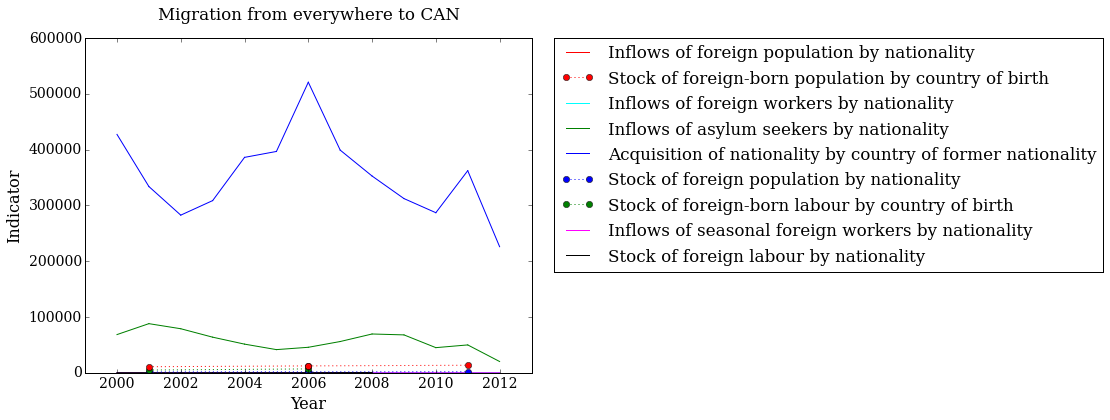

In [11]:
oecd.show(destination_country="Canada")

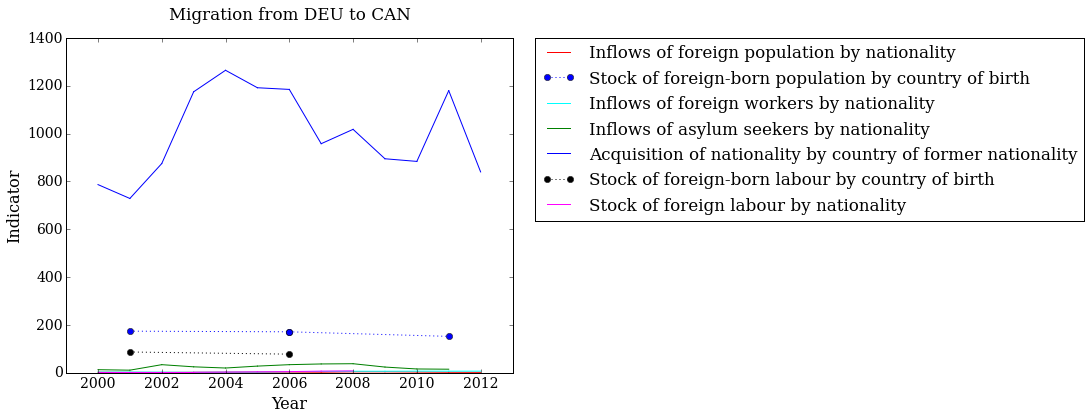

In [12]:
oecd.show(destination_country="Canada", origin_country="Germany")

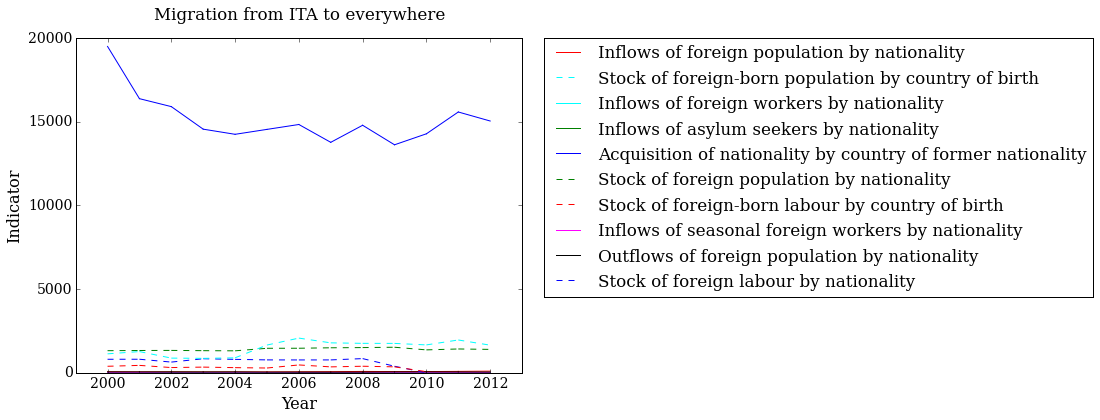

In [13]:
oecd.show(origin_country="Italy")